## Handwritten Digits Recognition model: This model will recognize/identify any handwritten digits accurately

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the dataset from MNIST dataset.
The MNIST dataset of handwritten digits has a training set of 60000 samples and testing set of 10000 samples

In [2]:
from keras.datasets import mnist
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
ytrain.shape

(60000,)

In [6]:
ytest.shape

(10000,)

Let's look at the data from MNIST dataset

In [7]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

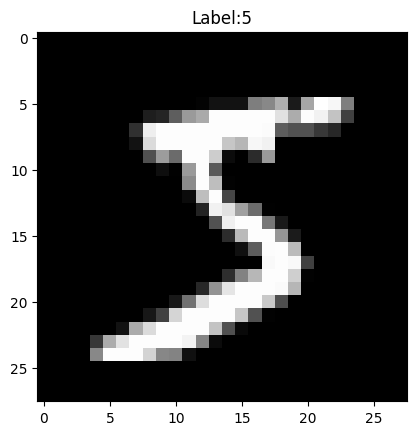

In [8]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')
plt.title(f'Label:{ytrain[0]}')
plt.show()

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


<Axes: >

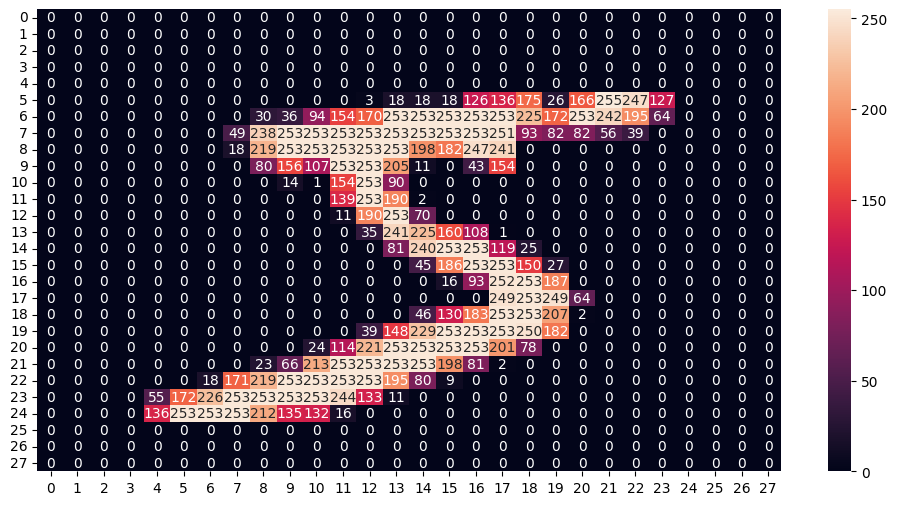

In [10]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(xtrain[0],annot=True,fmt='d')

## Data Pre-Processing

Let's check unique values in ytrain 

In [11]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Scale the train and test data. Since pixel values are in range 0-255, we can divide entire data with 255 inorder to maintain uniformity among entire data

In [12]:
xtrain_scl = xtrain.astype(float)/255
xtest_scl = xtest.astype(float)/255

Since, this is multiclass classification, we need to perform one hot encoding on y data

In [13]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [14]:
ytrain_cat[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [15]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Build the CNN model

In [16]:
from keras.models import Sequential
from keras.layers import Input,Conv2D,MaxPool2D,Flatten,Dropout,Dense

In [18]:
# Initialize the model
model = Sequential()

# Add the Input layer. 
# 28*28 is the shape of xtrain, 1 is added for filters(to store the results) which are going to be provided in next step
model.add(Input(shape=(28,28,1)))

# Add the Convolution layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

# Add the Maxpooling layer 1. Maxpool will consider the maximum value from each matrix and return a 2*2 matrix
model.add(MaxPool2D(pool_size=(2,2)))

# Add the Convolution layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

# Add the Maxpooling layer 2.
model.add(MaxPool2D(pool_size=(2,2)))

# Add the Flatten layer
model.add(Flatten())

# Add the Dropout layer. 
# Adding 50% dropout , so that 50% connections get dropped out. This helps to overcome overfitting scenario.
model.add(Dropout(rate=0.5))

# Add the Output layer. Here units represents number of classes in y. We have 10 classes, so we give units=10
model.add(Dense(units=10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [20]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')

We are providing validation split so that training data is further divided into train and test(validation). 
This ensures that our model is not prone to overfitting.

Epoch refers to one complete pass of training dataset through the algorithm

In [21]:
hist = model.fit(xtrain_scl,ytrain_cat,validation_split=0.1,epochs=20)

Epoch 1/20
1688/1688 [==============================] - 91s 52ms/step - loss: 0.2301 - accuracy: 0.9293 - val_loss: 0.0604 - val_accuracy: 0.9832
Epoch 2/20
1688/1688 [==============================] - 90s 53ms/step - loss: 0.0843 - accuracy: 0.9737 - val_loss: 0.0475 - val_accuracy: 0.9870
Epoch 3/20
1688/1688 [==============================] - 63s 37ms/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0386 - val_accuracy: 0.9897
Epoch 4/20
1688/1688 [==============================] - 70s 42ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0350 - val_accuracy: 0.9897
Epoch 5/20
1688/1688 [==============================] - 71s 42ms/step - loss: 0.0479 - accuracy: 0.9848 - val_loss: 0.0340 - val_accuracy: 0.9903
Epoch 6/20
1688/1688 [==============================] - 89s 53ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0349 - val_accuracy: 0.9912
Epoch 7/20
1688/1688 [==============================] - 70s 42ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0337 -

### Plot the Learning Curve
Learning Curve helps us to understand model's performance with different epochs.

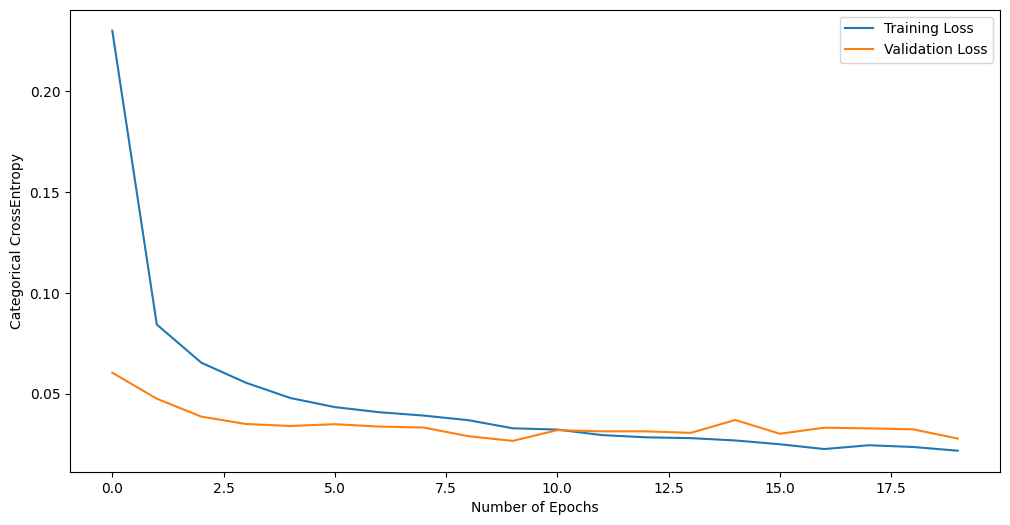

In [24]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Categorical CrossEntropy')
plt.legend()
plt.show()

## Evaluate the model

In [25]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 [==============================] - 24s 13ms/step - loss: 0.0076 - accuracy: 0.9979


[0.007631550543010235, 0.9979000091552734]

In [26]:
model.evaluate(xtest_scl,ytest_cat)

313/313 [==============================] - 5s 16ms/step - loss: 0.0261 - accuracy: 0.9923


[0.026115670800209045, 0.9922999739646912]

## Model Prediction

In [27]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 5s 15ms/step


In [28]:
yprob_train[:5]

array([[1.24423299e-13, 6.01061491e-14, 1.85718191e-10, 7.23209290e-04,
        1.31048110e-15, 9.99276459e-01, 1.52502370e-14, 2.90919011e-10,
        1.47706629e-07, 2.57214850e-07],
       [9.99999881e-01, 3.50643351e-17, 1.61830414e-07, 1.49041763e-13,
        8.18125949e-12, 1.90343418e-11, 1.00942419e-08, 1.59941007e-15,
        9.30329092e-10, 3.99365980e-08],
       [1.52485684e-17, 6.88183288e-10, 7.32186230e-13, 1.10220560e-14,
        9.99999881e-01, 1.20649755e-14, 3.29136738e-15, 6.96583058e-08,
        4.31272865e-11, 1.56329261e-08],
       [1.25563009e-08, 9.99997616e-01, 1.14153032e-07, 7.02849508e-13,
        7.23375081e-07, 1.83356438e-11, 5.44172574e-09, 9.18592207e-07,
        5.95013944e-07, 2.29180275e-09],
       [8.47908034e-14, 4.50188552e-13, 3.60551033e-10, 1.93144459e-10,
        4.20487459e-06, 1.72864882e-11, 5.05565180e-17, 1.17261054e-08,
        1.85827093e-06, 9.99993920e-01]], dtype=float32)

In [29]:
yprob_test[:5]

array([[1.06636826e-11, 2.36291089e-14, 1.50475508e-08, 9.75256143e-09,
        1.09495939e-15, 4.09235319e-12, 1.16219159e-21, 1.00000000e+00,
        8.28088900e-12, 4.87881568e-10],
       [1.61591373e-07, 3.93000771e-10, 9.99999881e-01, 2.98463294e-12,
        3.74459665e-12, 1.61357778e-16, 3.83916188e-09, 3.49287487e-14,
        1.24884203e-09, 2.37033141e-14],
       [6.92295687e-09, 9.99890089e-01, 1.48775655e-07, 8.06405887e-10,
        1.03680111e-04, 1.84462157e-09, 1.66549246e-08, 2.06612549e-06,
        4.03438980e-06, 1.02500035e-08],
       [9.99998808e-01, 2.64071177e-16, 5.44669149e-07, 4.03662477e-12,
        3.05514480e-09, 1.07845510e-08, 4.80793972e-07, 8.32639773e-12,
        3.92007315e-08, 5.54390098e-08],
       [1.73230917e-12, 2.18049616e-15, 3.40428293e-12, 6.69207591e-16,
        1.00000000e+00, 1.95558562e-13, 3.18257204e-12, 1.74555432e-14,
        1.75277657e-11, 4.33082725e-09]], dtype=float32)

In [35]:
ypred_train = np.argmax(yprob_train,axis=1)
ypred_test = np.argmax(yprob_test,axis=1)

In [36]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
ypred_train[:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [39]:
ytest[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [40]:
ypred_test[:5]

array([7, 2, 1, 0, 4], dtype=int64)

## Plot the Confusion matrix and Classification Report

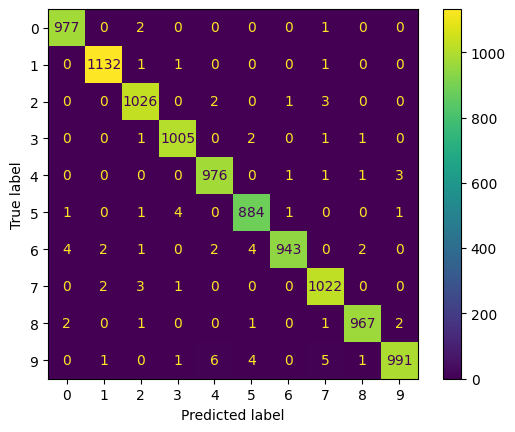

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_test)
ConfusionMatrixDisplay(cf).plot()

In [42]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Above model is a good model as f1-score avg is 0.99.

In [43]:
# Save the model for future use
model.save('Model for Handwritten Digits Recognition.keras')